In [8]:
import os
import sys

ROOT_PATH = os.path.abspath("../../")
sys.path.append(ROOT_PATH)

In [9]:
import json
from common.dataset.dataloader import DataLoader, LanguageTag
from common.utils.images import display_image, encode_image_base64

dataloader = DataLoader(index=0, language=LanguageTag.KOR)

In [10]:
id = dataloader.get_random_id()
item = dataloader.get_item(item_id=id)
item

{'item_id': 'B07BHFLJGV',
 'bullet_point': '네이비 블루, 풀 사이즈 여행용 우산은 컴팩트한 사이즈로 닫힙니다.',
 'item_name': 'AmazonBasics 자동 여행용 소형 소형 소형 우산, 풍력 통풍구 포함), WXD0927WD',
 'product_type': ['UMBRELLA'],
 'main_image_id': '71aQBPEW8SL',
 'other_image_id': ['71WL91ZXgUL',
  '81jFhpQEVVL',
  '81dqKi9VU9L',
  '81gOVAgsNjL',
  '81cXbQI4kKL'],
 'node': ['/Departments/Luggage & Travel Gear/Umbrellas/Stick Umbrellas'],
 'image_id': '71aQBPEW8SL',
 'height': 1806.0,
 'width': 1928.0,
 'img_path': '88/881a9b92.jpg'}


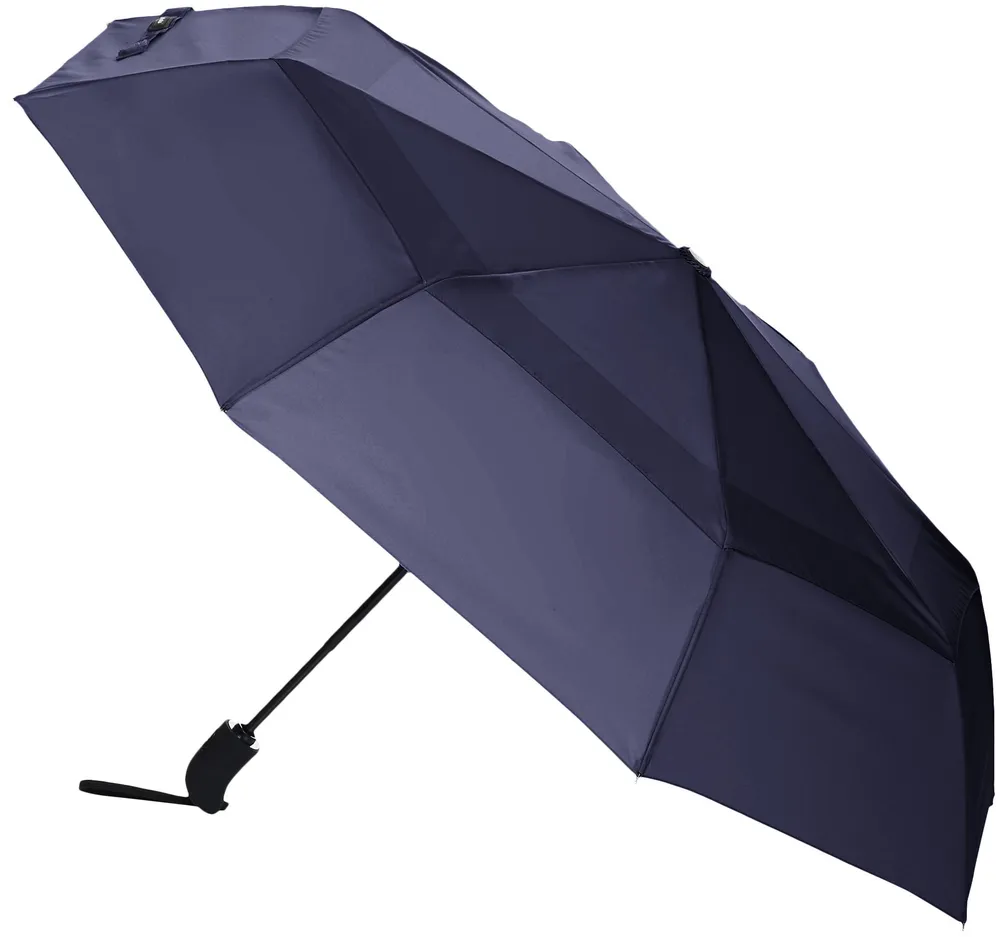

In [13]:
img_id = item.get('main_image_id')
img = dataloader.get_image(image_id=img_id)
encoded_base64 = encode_image_base64(img)
display_image(encoded_base64)

상품 정보는 위와 같이 JSON 형태로 표현될 수 있습니다. 해당 정보만으로는 제품 자체의 특성을 설명하기에는 부족하여, 사용자가 원하는 제품 정보를 검색 및 확인 하는 데 어려움을 겪을 수 있습니다.

또한 LLM 일반적으로 자연어 텍스트로 학습이 되어 있어, JSON 구조에서는 필요한 정보를 효율적으로 추출하기 어려울 수 있습니다.

이를 해결하기 위해 아래와 같은 데이터 가공 작업을 수행합니다.

- 제품 이름과 관련된 모든 정보를 한국어로 번역하여, 사용자가 보다 쉽게 접근할 수 있도록 합니다.
- JSON 필드값과 상품 이미지를 기반으로, 제품의 주요 특성을 강조하는 설명 문구를 새롭게 작성합니다. 이를 통해 사용자에게 더 명확하고 유용한 정보를 제공할 수 있습니다.

In [14]:
from common.dataset.augmentation import Augmentation

augmentation = Augmentation()

# 상품 소개 글 생성
desc = augmentation.gen_description(item=item, image=encoded_base64)
print(desc)

# 상품 메타 정보 JSON 포맷으로 생성
metadata = augmentation.gen_properties(item=item, image=encoded_base64)
metadata

비 오는 날, 당신의 스타일을 지켜줄 완벽한 동반자를 소개합니다! AmazonBasics의 자동 여행용 우산으로 우아함과 실용성을 동시에 잡으세요.

네이비 블루의 세련된 색상으로 어떤 옷차림에도 잘 어울리는 이 우산은 풀 사이즈로 넓은 커버리지를 제공하면서도, 놀랍게도 컴팩트한 크기로 접힙니다. 가방에 쏙 들어가는 크기로 언제 어디서나 휴대가 간편해요.

자동 개폐 기능으로 한 손으로도 쉽게 펼치고 접을 수 있어 바쁜 도시 생활에 딱이죠. 특히 풍력 통풍구가 있어 강한 바람에도 뒤집히지 않고 안정적으로 사용할 수 있답니다.

여행이든 출퇴근이든, 이 우산 하나면 갑작스러운 비에도 당황하지 않고 우아하게 대처할 수 있어요. 작지만 강한 이 우산으로 어떤 날씨에도 자신감 넘치는 당신의 모습을 만나보세요!

지금 AmazonBasics 자동 여행용 우산을 선택하고, 비 오는 날의 새로운 멋을 발견해보세요. 당신의 스타일을 한층 업그레이드할 기회를 놓치지 마세요!


{'namekor': '아마존베이직스 자동 여행용 소형 우산',
 'summary': '네이비 블루 색상의 컴팩트한 자동 접이식 여행용 우산입니다.',
 'image_summary': '이 제품은 네이비 블루 색상의 자동 접이식 우산입니다. 우산의 캐노피는 견고한 폴리에스터 소재로 만들어졌으며, 블랙 컬러의 손잡이와 프레임이 특징입니다. 우산은 접혀있는 상태로 컴팩트한 크기를 유지하며, 자동 개폐 기능이 있어 편리합니다.',
 'tags': ['네이비 블루', '자동 접이식', '여행용', '컴팩트', '폴리에스터', '풍력 통풍구', '우산']}

In [15]:
# 상품 메타 정보 JSON 포맷으로 생성
metadata = augmentation.gen_properties(item=item, image=encoded_base64)
metadata

{'namekor': '아마존베이직스 자동 여행용 소형 우산',
 'summary': '네이비 블루 색상의 컴팩트한 자동 접이식 여행용 우산입니다.',
 'image_summary': '이 제품은 네이비 블루 색상의 자동 접이식 우산입니다. 우산의 캐노피는 견고한 폴리에스터 소재로 만들어져 있으며, 블랙 컬러의 손잡이와 프레임이 특징입니다. 우산은 접혀있는 상태로 컴팩트한 크기를 유지하며, 자동 개폐 기능이 있어 편리합니다.',
 'tags': ['네이비 블루', '자동 접이식', '여행용', '컴팩트', '폴리에스터', '방풍', '경량']}